Rosenblattによるパーセプトロンの初期の学習規則
1. 重みを0または値の小さい乱数で初期化
2. トレーニングサンプル $ \bf{x^{(i)}} $ごとに以下の手順を実行<br>
2-1. 出力値 $ \hat{y} $ を計算する<br>
2-2. 重みを更新する

重みを更新する式<br>
$ {\bf w}_j := {\bf w}_j + \Delta{\bf w}_j $<br>
$ \Delta{\bf w}_j = \eta({\bf y}^{(i)} - {\bf\hat y}^{(i)}){\bf x}^{(i)} $


In [25]:
import numpy as np

class Perceptron(object):
    '''
    パーセプトロン分類器
    
    パラメータ
    ----
    eta : float -学習率 (0.0 <= eta <= 1.0)
    n_itr : int -トレーニング回数
    
    属性
    ----
    w_ : 一次元配列 -fit後の重み
    errors_ : リスト -各エポックでの誤分類数
    '''
    
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    
    def fit(self, X, y):
        """
        トレーニングデータに適合（fit）させる
        
        パラメータ
        ----
        X : 配列, shape = [n_samples, n_features] -トレーニングデータ
        y : 配列, shape = [n_samples] -目的変数
        
        戻り値
        ----
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter): # n_iter回トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y): # 各サンプルで重みを更新
                # 重み w_1…, w_mの更新
                # ⊿w_j = η(y_i - ^y_i)x_i_j (j=1,…,m)
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重み w_0の更新:⊿w_0 = η(y_i - ^y_i)
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        """
        総入力を計算
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        """
        1ステップ後のクラスラベルを返す
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [26]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


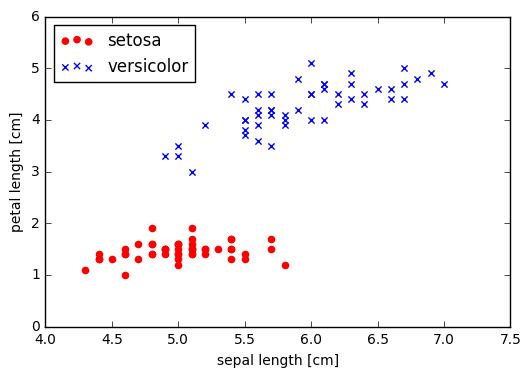

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 1-100行目の目的変数抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1に、Iris-versicolorを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3項目目を抽出
X = df.iloc[0:100, [0,2]].values
# Iris-setosaのプロット
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# Iris-versicolorのプロット
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
# 軸のラベル設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()

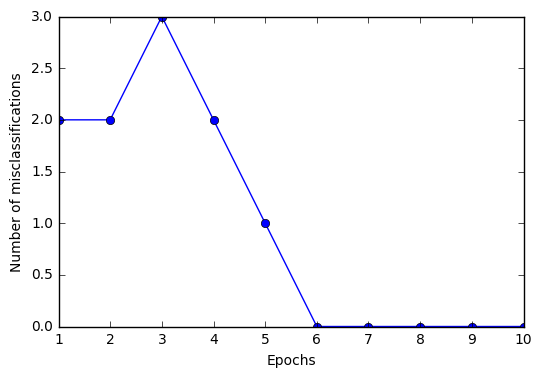

In [28]:
# パーセプトロンのオブジェクト生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
# 図の表示
plt.show()